In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from datetime import datetime

In [2]:
stat_df = pd.read_csv('data/statipy_results.csv')
stat_df.head()

,Unnamed: 0,Track,Explicit,Tpopularity,Artist,Album,Rdate
0,0,Paradise,False,49,Voyage,Paradise,2018-02-14
1,1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24
2,2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03
3,3,Night,False,39,John Carpenter,Lost Themes,2015-02-03
4,4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17


##  Stat_df initial data types

In [3]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
Unnamed: 0     991 non-null int64
Track          991 non-null object
Explicit       991 non-null bool
Tpopularity    991 non-null int64
Artist         991 non-null object
Album          991 non-null object
Rdate          991 non-null object
dtypes: bool(1), int64(2), object(4)
memory usage: 47.5+ KB


## 1. Convert 'Rdate' to date time | stat_df

In [4]:
stat_df['Rdate'] = pd.to_datetime(stat_df['Rdate'])

##### drop second index

In [5]:
statidate_i = stat_df.drop('Unnamed: 0', axis=1)

##### STATIDATE_I = datetime index

In [6]:
statidate_i['Rdate']= pd.DatetimeIndex(statidate_i['Rdate'], freq='infer')

In [7]:
statidate_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 6 columns):
Track          991 non-null object
Explicit       991 non-null bool
Tpopularity    991 non-null int64
Artist         991 non-null object
Album          991 non-null object
Rdate          991 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 39.8+ KB


In [8]:
statidate_i.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate
0,Paradise,False,49,Voyage,Paradise,2018-02-14
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03
3,Night,False,39,John Carpenter,Lost Themes,2015-02-03
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17


## 2. add count / frequency columns  | Statidate_i 
artist x track
track x track
release dates x track

In [9]:
statidate_i['artsongcnt'] = statidate_i.groupby('Artist')['Track'].transform('count')

In [10]:
statidate_i['songfreq'] = statidate_i.groupby('Track')['Track'].transform('count')

In [11]:
statidate_i['datefreq'] = statidate_i.groupby('Rdate')['Track'].transform('count')

## 3. Division 1 - Artist by regular datetime  |  art_desc
##### Artists Album(Rdate) avg album data - per datetime['YYYY-MM-DD']
(explicit content, popularity, artsongcnt, songfreq, date freq) 

In [12]:
art_desc = statidate_i.groupby(['Artist', 'Rdate'])
art_desc.mean()

,,Explicit,Tpopularity,artsongcnt,songfreq,datefreq
Artist,Rdate,,,,,
!!!,2017-03-22,0.0,38.000000,2.0,2.000000,2.0
2Pac,2014-11-07,1.0,43.000000,1.0,1.000000,4.0
Aaron Copland,1960-01-01,0.0,50.000000,1.0,1.000000,4.0
Adam Joseph,2017-05-03,0.0,40.000000,1.0,1.000000,1.0
Adore Delano,2014-06-03,1.0,49.000000,1.0,1.000000,1.0
Adrianne Lenker,2018-10-05,0.0,58.000000,1.0,1.000000,2.0
Agnes Obel,2013-01-01,0.0,53.000000,1.0,1.000000,8.0
Ah-Mer-Ah-Su,2017-02-26,0.0,5.000000,2.0,2.000000,2.0
Aja,2017-02-02,0.0,49.000000,5.0,1.000000,1.0


## 4. arrange tracks by YEAR (compress release dates)  |  dategroup YEAR

In [13]:
dategroup = statidate_i
dategroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 9 columns):
Track          991 non-null object
Explicit       991 non-null bool
Tpopularity    991 non-null int64
Artist         991 non-null object
Album          991 non-null object
Rdate          991 non-null datetime64[ns]
artsongcnt     991 non-null int64
songfreq       991 non-null int64
datefreq       991 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(4), object(3)
memory usage: 63.0+ KB


In [14]:
dategroup['Rdate'] = pd.DatetimeIndex(dategroup['Rdate']).year

In [15]:
dategroup.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,datefreq
0,Paradise,False,49,Voyage,Paradise,2018,1,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015,1,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015,1,1,2
3,Night,False,39,John Carpenter,Lost Themes,2015,1,1,2
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017,1,1,1


## 5. Division 2 - Artist by Year datetime  |  art_desc_dt

##### Artists Avg Stats each year - per datetime[YYYY]
(explicit content, popularity, artsongcnt, songfreq, date freq) 

In [16]:
art_desc_dt = dategroup.groupby(['Artist', 'Rdate'])
art_desc_dt.mean()

,,Explicit,Tpopularity,artsongcnt,songfreq,datefreq
Artist,Rdate,,,,,
!!!,2017,0.0,38.000000,2.0,2.000000,2.0
2Pac,2014,1.0,43.000000,1.0,1.000000,4.0
Aaron Copland,1960,0.0,50.000000,1.0,1.000000,4.0
Adam Joseph,2017,0.0,40.000000,1.0,1.000000,1.0
Adore Delano,2014,1.0,49.000000,1.0,1.000000,1.0
Adrianne Lenker,2018,0.0,58.000000,1.0,1.000000,2.0
Agnes Obel,2013,0.0,53.000000,1.0,1.000000,8.0
Ah-Mer-Ah-Su,2017,0.0,5.000000,2.0,2.000000,2.0
Aja,2017,0.5,48.000000,5.0,1.000000,1.0


## 6. Division 3 - Year --  avg stats  |  dt_desc

#### Avg stats per YEAR
(explicit content, popularity, artsongcnt, songfreq, date freq) 

In [17]:
dt_desc = dategroup.groupby(['Rdate'])
dt_desc.mean()

,Explicit,Tpopularity,artsongcnt,songfreq,datefreq
Rdate,,,,,
1933,0.000000,42.666667,7.000000,1.000000,3.000000
1937,0.000000,55.000000,1.000000,1.000000,1.000000
1941,0.000000,44.000000,4.000000,1.000000,1.000000
1955,0.000000,48.000000,4.000000,1.000000,1.000000
1956,0.000000,43.800000,6.200000,1.000000,6.800000
1957,0.000000,46.600000,5.000000,1.600000,5.000000
1958,0.000000,52.000000,4.000000,1.000000,1.666667
1959,0.000000,60.500000,2.500000,1.000000,2.000000
1960,0.000000,53.500000,2.500000,1.000000,4.000000


## 7. DIVISION 4 : # of song frequency in playlist

In [18]:
tr3y = dategroup[dategroup['songfreq']>=3]
tr2y = dategroup[dategroup['songfreq']==2]
tr1y = dategroup[dategroup['songfreq']<=1]

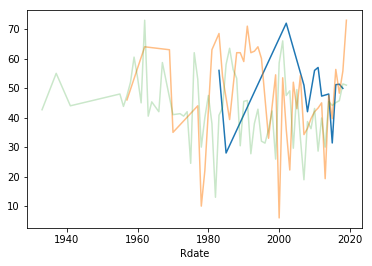

In [19]:
tr3y.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=1)
tr2y.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=0.50)
tr1y.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=0.25)

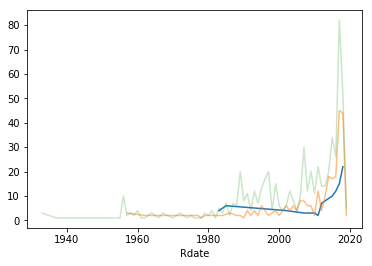

In [20]:
tr3y.groupby(['Rdate'])['Explicit'].count().plot.line(stacked=True, alpha=1)
tr2y.groupby(['Rdate'])['Explicit'].count().plot.line(stacked=True, alpha=0.50)
tr1y.groupby(['Rdate'])['Explicit'].count().plot.line(stacked=True, alpha=0.25)

## 8. DIVISION 5 : # of song frequency in each date |  dategroup Y

In [21]:
freqdates = dategroup[dategroup['datefreq']>=8]
maxfreqdates = dategroup[dategroup['datefreq']>=15]
minfreqdates = dategroup[dategroup['datefreq']==1]

In [22]:
date_i = freqdates.groupby(['Rdate'])[['Explicit', 'Tpopularity', 'datefreq']].mean()
date_max = maxfreqdates.groupby(['Rdate'])[['Explicit', 'Tpopularity', 'datefreq']].mean()
date_max

,Explicit,Tpopularity,datefreq
Rdate,,,
1989,0.000000,28.526316,19.0
1996,0.000000,28.466667,15.0
1997,0.000000,31.888889,18.0
2007,0.142857,3.333333,21.0
2017,0.100000,43.400000,20.0


In [24]:
date_i

,Explicit,Tpopularity,datefreq
Rdate,,,
1956,0.000000,38.375000,8.00000
1983,0.363636,51.363636,11.00000
1989,0.000000,28.526316,19.00000
1995,0.000000,31.153846,13.00000
1996,0.000000,28.466667,15.00000
1997,0.000000,31.888889,18.00000
1999,0.000000,24.500000,14.00000
2002,0.000000,39.375000,8.00000
2006,0.250000,46.375000,8.00000


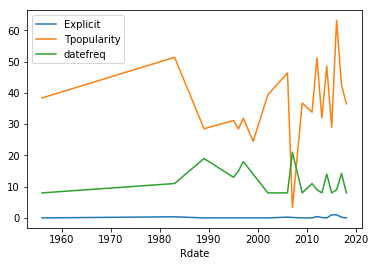

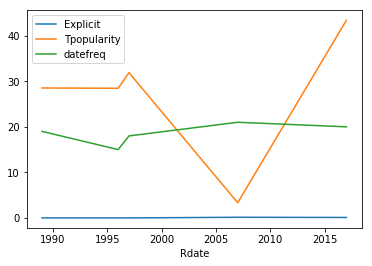

In [23]:
date_i.plot()
date_max.plot()

## 9. DIVISION 6 : # of song frequency in each date |  dategroup Y

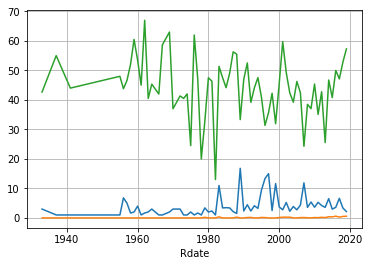

In [25]:
dategroup.groupby('Rdate')['datefreq'].mean().plot.line(stacked=True, grid=True)
dategroup.groupby('Rdate')['Explicit'].mean().plot.line(stacked=True, grid=True)
dategroup.groupby('Rdate')['Tpopularity'].mean().plot.line(stacked=True, grid=True)

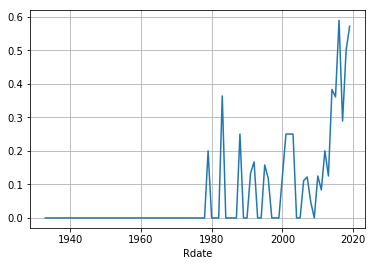

In [33]:
dategroup.groupby('Rdate')['Explicit'].mean().plot.line(stacked=True, grid=True)

## 10. DIVISION 7 : #dates with 1 song only |  mindate Y

In [34]:
mindate = dategroup[dategroup['datefreq']==1]
mindate.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,datefreq
0,Paradise,False,49,Voyage,Paradise,2018,1,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015,1,1,1
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017,1,1,1
7,Level Ya Pussy Up,False,49,Aja,Level Ya Pussy Up,2017,5,1,1
8,Pose,False,55,Naomi Smalls,Pose,2018,1,1,1


In [35]:
toppop_datemin = mindate[mindate['Tpopularity']>=43]
lowpop_datemin = mindate[mindate['Tpopularity']<=43]

In [36]:
len(lowpop_datemin)

82

In [37]:
len(toppop_datemin)

130

## 10. DIVISION 7 : high popular dates - explicit x songfrequency / popuarlity |  tpdm -scatter plot 

In [62]:
tpdm = toppop_datemin
lpdm = lowpop_datemin

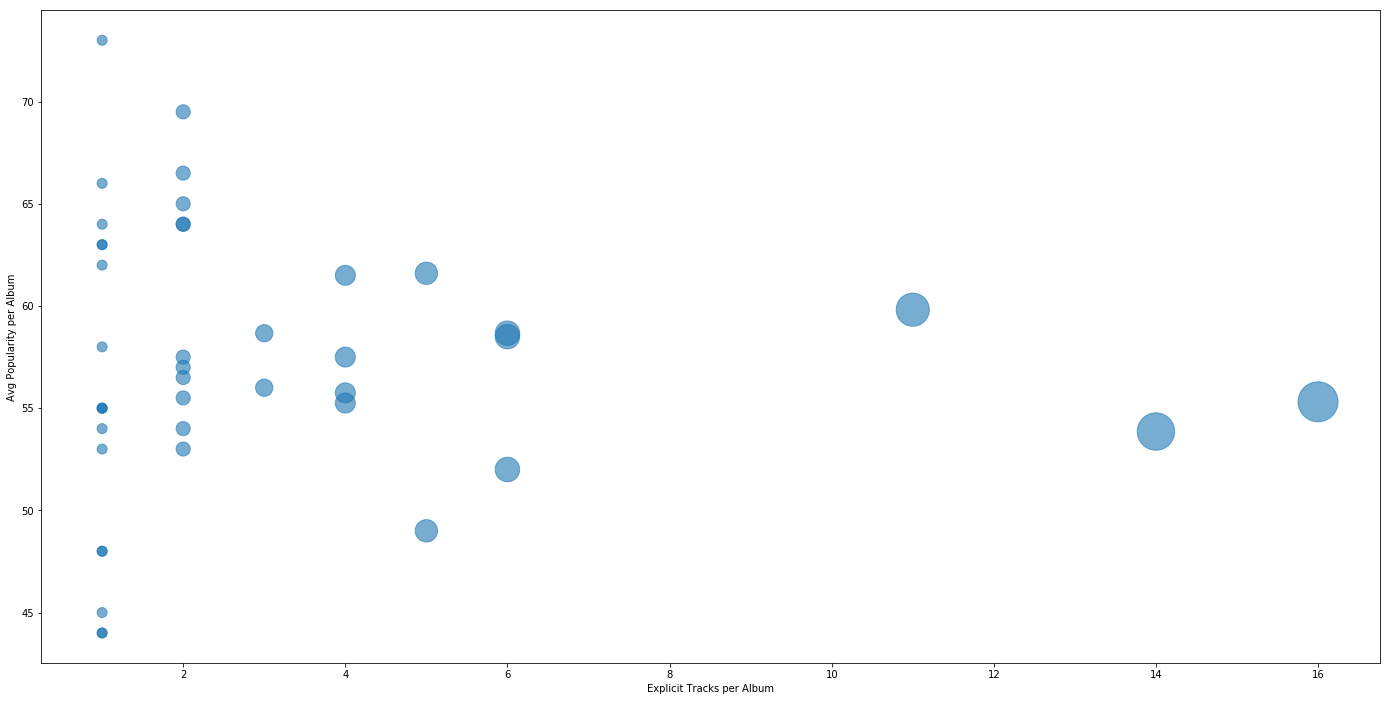

In [61]:
x = tpdm.groupby('Rdate')['Explicit'].count()
y = tpdm.groupby('Rdate')['Tpopularity'].mean()
s = tpdm.groupby('Rdate')['songfreq'].count()

fig, ax = plt.subplots(figsize=(24, 12))
ax.scatter(x, y, s*100, alpha=0.60);
ax.set_xlabel('Explicit Tracks per Album')
ax.set_ylabel('Avg Popularity per Album')

plt.show()

## 11. DIVISION 7 : low popular dates - explicit x songfrequency / popuarlity |  lpdm -scatter plot 

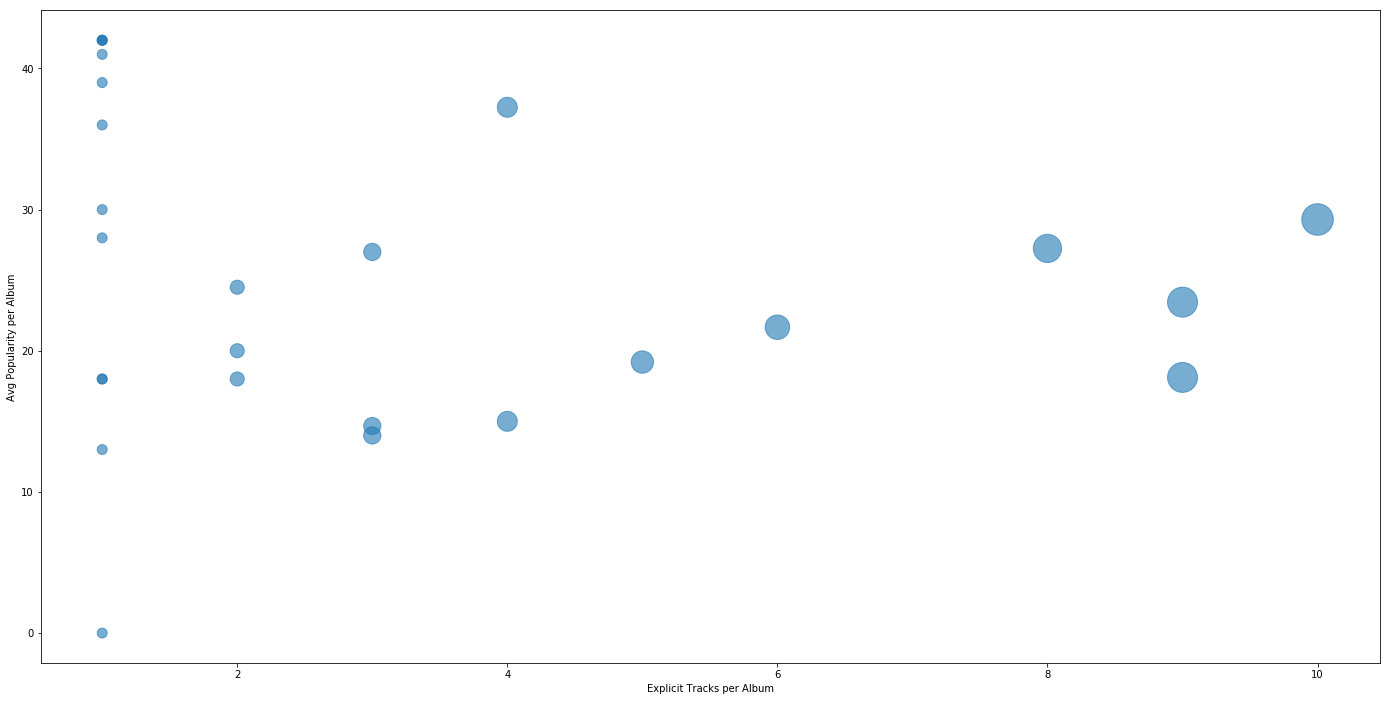

In [63]:
x = lpdm.groupby('Rdate')['Explicit'].count()
y = lpdm.groupby('Rdate')['Tpopularity'].mean()
s = lpdm.groupby('Rdate')['songfreq'].count()

fig, ax = plt.subplots(figsize=(24, 12))
ax.scatter(x, y, s*100, alpha=0.60);
ax.set_xlabel('Explicit Tracks per Album')
ax.set_ylabel('Avg Popularity per Album')

plt.show()

## 12. DIVISION 7 : high & low popular dates - songfrequency (repeats) / dates |  lpdm -scatter plot 

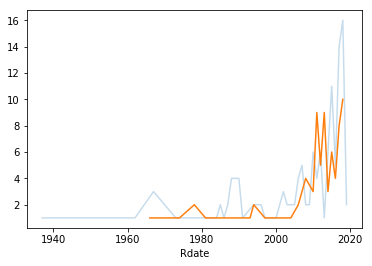

In [66]:
tpdm.groupby('Rdate')['songfreq'].count().plot.line(stacked=True, alpha=.25)
lpdm.groupby('Rdate')['songfreq'].count().plot.line(stacked=True)